David Antonio Garzón Avendaño

#Point 1

Find the best and worst cases for the Gale-Shapley and Irving ( An Efficient Algorithm for the “Stable Roommates” Problem) Algorithms and run in Colab these algorithms for those cases for n=4 and 40.

In [49]:
import pandas as pd
import numpy as np
from collections import Counter
from copy import copy

In [50]:

def stable_co(man_df,women_df, man_list, women_list):
  women_available = {man:women_list for man in man_list}
  # waiting list of men that were able to create pair on each iteration
  waiting_list = []
  # dict to store created pairs
  proposals = {}
  # variable to count number of iterations
  count = 0

  while len(waiting_list)<len(man_list):
      # man makes proposals
      for man in man_list:
          if man not in waiting_list:
              # each man make proposal to the top women from it's list
              women = women_available[man]
              best_choice = man_df.loc[man][man_df.loc[man].index.isin(women)].idxmin()
              proposals[(man, best_choice)]=(man_df.loc[man][best_choice],
                                                  women_df.loc[man][best_choice])
      # if women have more than one proposals 
      # she will choose the best option
      overlays = Counter([key[1] for key in proposals.keys()])
      # cycle to choose the best options
      for women in overlays.keys():
          if overlays[women]>1:
              # pairs to drop from proposals
              pairs_to_drop = sorted({pair: proposals[pair] for pair in proposals.keys() 
                      if women in pair}.items(), 
                    key=lambda x: x[1][1]
                    )[1:]
              # if man was rejected by woman
              # there is no pint for him to make proposal 
              # second time to the same woman
              for p_to_drop in pairs_to_drop:
                  del proposals[p_to_drop[0]]
                  _women = copy(women_available[p_to_drop[0][0]])
                  _women.remove(p_to_drop[0][1])
                  women_available[p_to_drop[0][0]] = _women
      # man who successfully created pairs must be added to the waiting list 
      waiting_list = [man[0] for man in proposals.keys()]
      # update counter
      count+=1
  print("Las parejas son: " + str(list(proposals.keys())))
  return count

Para el peor caso:

 - La lista de los hombres es ciclica conservando el último elemento en su posición, y haciendo rotar a los n - 1 primeros elementos, por ejemplo, las listas para el caso n = 3 serian: [1, 2, 3], [2, 1, 3], [1, 2, 3]

 - La lista de las mujeres es una lista ciclica en reversa, es decir, se parte por ejemplo de de [3,2,1] y se va moviendo el último elementoa la posición del primero, y el resto de elementos se corren a la derecha. Entonces las listas para el caso n = 3 serian: [3, 2, 1], [1, 3, 2], [2, 1, 3]

Para el mejor caso: 
- tanto hombre como mujeres deben tener listas ciclicas pasando el ultimo elemento a la primera posición, es decir, las listas para el caso n = 3 serian: [1, 2, 3], [3, 1, 2], [2, 3, 1]


In [32]:
def numeros_hombres(elements):
    lista = [i for i in range(1, elements+1)]
    respuesta = [[i for i in range(1, elements+1)]]
    for i in range(len(lista) - 1):
        move = lista.pop(len(lista)-2)
        lista.insert(0, move)
        temp = lista[:]
        respuesta.append(temp)
    return respuesta

def numeros_mujeres(elements):
    lista = [i for i in range(elements, 0,-1)]
    respuesta = [[i for i in range(elements, 0, -1)]]
    for i in range(len(lista) - 1):
        move = lista.pop(len(lista)-1)
        lista.insert(0, move)
        temp = lista[:]
        respuesta.append(temp)
    return respuesta

def mejor_hm(elements):
    lista = [i for i in range(1, elements+1)]
    respuesta = [[i for i in range(1, elements+1)]]
    for i in range(len(lista) - 1):
      move = lista.pop(len(lista)-1)
      lista.insert(0, move)
      temp = lista[:]
      respuesta.append(temp)
    return respuesta


print(mejor_hm(3))

[[1, 2, 3], [3, 1, 2], [2, 3, 1]]


##Worst Cases


In [40]:
# Casos de 4 mujeres y 4 hombres

man_list = ['a','b','c','d']
women_list = ['A','B','C','D']
man_df = pd.DataFrame(numeros_hombres(4), index = man_list, columns = women_list)
women_df = pd.DataFrame(numeros_mujeres(4), index = man_list, columns = women_list)

In [38]:
man_df

,A,B,C,D
a,1,2,3,4
b,4,1,2,3
c,3,4,1,2
d,2,3,4,1


In [39]:
women_df

,A,B,C,D
a,4,3,2,1
b,1,4,3,2
c,2,1,4,3
d,3,2,1,4


In [41]:
print("El peor caso se demora: " + str(stable_co(man_df,women_df, man_list, women_list)) + " días.")

Las parejas son: [('b', 'A'), ('c', 'B'), ('d', 'C'), ('a', 'D')]
El peor caso se demora: 10 días.


In [80]:
# Casos de 40 mujeres y 40 hombres
letras_mayus = [chr(i) for i in range(65, 91)] + [chr(i)+chr(i) for i in range(65,65+14)]
letras_minu = [chr(i) for i in range(97, 97+26)] + [chr(i)+chr(i) for i in range(97,97+14)]
man_list2 = letras_minu
women_list2 = letras_mayus

man_df2 = pd.DataFrame(numeros_hombres(40), index = man_list2, columns = women_list2)
women_df2 = pd.DataFrame(numeros_mujeres(40), index = man_list2, columns = women_list2)

In [42]:
man_df2 

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z,AA,BB,CC,DD,EE,FF,GG,HH,II,JJ,KK,LL,MM,NN
a,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
b,39,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,40
c,38,39,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,40
d,37,38,39,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,40
e,36,37,38,39,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,40
f,35,36,37,38,39,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,40
g,34,35,36,37,38,39,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,40
h,33,34,35,36,37,38,39,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,40
i,32,33,34,35,36,37,38,39,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,40
j,31,32,33,34,35,36,37,38,39,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,40


In [43]:
women_df2

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z,AA,BB,CC,DD,EE,FF,GG,HH,II,JJ,KK,LL,MM,NN
a,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1
b,1,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2
c,2,1,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3
d,3,2,1,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4
e,4,3,2,1,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5
f,5,4,3,2,1,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6
g,6,5,4,3,2,1,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7
h,7,6,5,4,3,2,1,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8
i,8,7,6,5,4,3,2,1,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9
j,9,8,7,6,5,4,3,2,1,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10


In [79]:
print("El peor caso se demora: " + str(stable_co(man_df2,women_df2, man_list2, women_list2)) + " días.")

Las parejas son: [('b', 'A'), ('c', 'B'), ('d', 'C'), ('e', 'D'), ('f', 'E'), ('g', 'F'), ('h', 'G'), ('i', 'H'), ('j', 'I'), ('k', 'J'), ('l', 'K'), ('m', 'L'), ('n', 'M'), ('o', 'N'), ('p', 'O'), ('q', 'P'), ('r', 'Q'), ('s', 'R'), ('t', 'S'), ('u', 'T'), ('v', 'U'), ('w', 'V'), ('x', 'W'), ('y', 'X'), ('z', 'Y'), ('aa', 'Z'), ('bb', 'AA'), ('cc', 'BB'), ('dd', 'CC'), ('ee', 'DD'), ('ff', 'EE'), ('gg', 'FF'), ('hh', 'GG'), ('ii', 'HH'), ('jj', 'II'), ('kk', 'JJ'), ('ll', 'KK'), ('mm', 'LL'), ('nn', 'MM'), ('a', 'NN')]
El peor caso se demora: 1522 días.


##Best Cases

In [81]:
# Casos de 4 mujeres y 4 hombres

man_list3 = ['a','b','c','d']
women_list3 = ['A','B','C','D']
man_df3 = pd.DataFrame(mejor_hm(4), index = man_list3, columns = women_list3)
women_df3 = pd.DataFrame(numeros_mujeres(4), index = man_list3, columns = women_list3)


In [44]:
man_df3

,A,B,C,D
a,1,2,3,4
b,4,1,2,3
c,3,4,1,2
d,2,3,4,1


In [45]:
women_df3

,A,B,C,D
a,4,3,2,1
b,1,4,3,2
c,2,1,4,3
d,3,2,1,4


In [46]:
print("El peor caso se demora: " + str(stable_co(man_df3,women_df3, man_list3, women_list3)) + " días.")

Las parejas son: [('a', 'A'), ('b', 'B'), ('c', 'C'), ('d', 'D')]
El peor caso se demora: 1 días.


In [82]:
# Casos de 40 mujeres y 40 hombres

letras_mayus = [chr(i) for i in range(65, 91)] + [chr(i)+chr(i) for i in range(65,65+14)]
letras_minu = [chr(i) for i in range(97, 97+26)] + [chr(i)+chr(i) for i in range(97,97+14)]
man_list4 = letras_minu
women_list4 = letras_mayus

man_df4 = pd.DataFrame(mejor_hm(40), index = man_list4, columns = women_list4)
women_df4 = pd.DataFrame(mejor_hm(40), index = man_list4, columns = women_list4)


In [47]:
man_df4

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z,AA,BB,CC,DD,EE,FF,GG,HH,II,JJ,KK,LL,MM,NN
a,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
b,40,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
c,39,40,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
d,38,39,40,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
e,37,38,39,40,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36
f,36,37,38,39,40,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
g,35,36,37,38,39,40,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
h,34,35,36,37,38,39,40,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
i,33,34,35,36,37,38,39,40,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
j,32,33,34,35,36,37,38,39,40,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31


In [48]:
women_df4

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z,AA,BB,CC,DD,EE,FF,GG,HH,II,JJ,KK,LL,MM,NN
a,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
b,40,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
c,39,40,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
d,38,39,40,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
e,37,38,39,40,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36
f,36,37,38,39,40,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
g,35,36,37,38,39,40,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
h,34,35,36,37,38,39,40,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
i,33,34,35,36,37,38,39,40,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
j,32,33,34,35,36,37,38,39,40,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31


In [83]:
print("El peor caso se demora: " + str(stable_co(man_df4, women_df4, man_list4, women_list4)) + " días.")

Las parejas son: [('a', 'A'), ('b', 'B'), ('c', 'C'), ('d', 'D'), ('e', 'E'), ('f', 'F'), ('g', 'G'), ('h', 'H'), ('i', 'I'), ('j', 'J'), ('k', 'K'), ('l', 'L'), ('m', 'M'), ('n', 'N'), ('o', 'O'), ('p', 'P'), ('q', 'Q'), ('r', 'R'), ('s', 'S'), ('t', 'T'), ('u', 'U'), ('v', 'V'), ('w', 'W'), ('x', 'X'), ('y', 'Y'), ('z', 'Z'), ('aa', 'AA'), ('bb', 'BB'), ('cc', 'CC'), ('dd', 'DD'), ('ee', 'EE'), ('ff', 'FF'), ('gg', 'GG'), ('hh', 'HH'), ('ii', 'II'), ('jj', 'JJ'), ('kk', 'KK'), ('ll', 'LL'), ('mm', 'MM'), ('nn', 'NN')]
El peor caso se demora: 1 días.


#Point 2

Run the Gale-Shapley Algorithm 100 times using random permutations as preference lists for n=4 and 40. Find the minimum, maximum and average number of iterations and plot the distribution of the number of iterations.

In [53]:
def rand_lists_men(n):
    res = []
    lista = [i for i in range(1, n+1)]
    for _ in range(n):
        x = lista[:]
        random.shuffle(x)
        res.append(x)
    return res

def rand_list_women(n):
    res = []
    lista = [i for i in range(1, n+1)]
    for _ in range(n):
        x = lista[:]
        random.shuffle(x)
        res.append(x)
    res2 = list(map(list, zip(*res)))
    return res2

In [90]:
#Caso n = 4
dias = [] 
man_list5 = ['a','b','c','d']
women_list5 = ['A','B','C','D']
for _ in range(0,100):
  women_df5 = pd.DataFrame(rand_list_women(4), index = man_list, columns = women_list)
  man_df5 = pd.DataFrame(rand_lists_men(4), index = man_list, columns = women_list)
  dias.append(stable_co(man_df5, women_df5, man_list5, women_list5))

Las parejas son: [('b', 'D'), ('c', 'B'), ('d', 'A'), ('a', 'C')]
Las parejas son: [('c', 'A'), ('b', 'C'), ('d', 'B'), ('a', 'D')]
Las parejas son: [('c', 'C'), ('b', 'D'), ('a', 'A'), ('d', 'B')]
Las parejas son: [('a', 'B'), ('b', 'D'), ('c', 'C'), ('d', 'A')]
Las parejas son: [('a', 'D'), ('c', 'A'), ('d', 'C'), ('b', 'B')]
Las parejas son: [('b', 'B'), ('c', 'A'), ('d', 'C'), ('a', 'D')]
Las parejas son: [('b', 'A'), ('c', 'C'), ('d', 'B'), ('a', 'D')]
Las parejas son: [('c', 'A'), ('d', 'C'), ('a', 'D'), ('b', 'B')]
Las parejas son: [('c', 'C'), ('d', 'A'), ('b', 'D'), ('a', 'B')]
Las parejas son: [('b', 'C'), ('c', 'A'), ('d', 'D'), ('a', 'B')]
Las parejas son: [('b', 'B'), ('c', 'C'), ('d', 'D'), ('a', 'A')]
Las parejas son: [('b', 'C'), ('d', 'A'), ('a', 'B'), ('c', 'D')]
Las parejas son: [('a', 'D'), ('b', 'B'), ('c', 'A'), ('d', 'C')]
Las parejas son: [('c', 'A'), ('d', 'D'), ('a', 'C'), ('b', 'B')]
Las parejas son: [('c', 'B'), ('d', 'D'), ('b', 'C'), ('a', 'A')]
Las pareja

Minimo: 1
Maximo: 9
promedio: 3.16


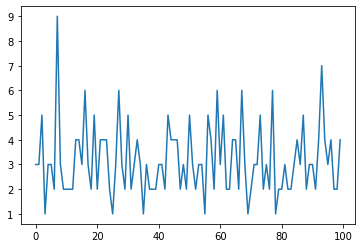

In [91]:

string = "Minimo: {}".format(min(dias))
string2 = "Maximo: {}".format(max(dias))
string3 = "promedio: {}".format(sum(dias)/100)

print(string)
print(string2)
print(string3)
plt.plot(dias);

In [87]:
#Caso n = 40

dias2 = [] 
man_list6 = [chr(i) for i in range(97, 97+26)] + [chr(i)+chr(i) for i in range(97,97+14)]
women_list6 = [chr(i) for i in range(65, 91)] + [chr(i)+chr(i) for i in range(65,65+14)]

for _ in range(0,100):
  women_df6 = pd.DataFrame(rand_list_women(40), index = man_list6, columns = women_list6)
  man_df6 = pd.DataFrame(rand_lists_men(40), index = man_list6, columns = women_list6)
  dias2.append(stable_co(man_df6, women_df6, man_list6, women_list6))

Las parejas son: [('e', 'B'), ('i', 'P'), ('m', 'II'), ('o', 'DD'), ('q', 'G'), ('hh', 'HH'), ('r', 'U'), ('aa', 'Q'), ('cc', 'L'), ('dd', 'W'), ('g', 'C'), ('h', 'EE'), ('bb', 'MM'), ('u', 'V'), ('ee', 'H'), ('k', 'Y'), ('t', 'F'), ('jj', 'KK'), ('j', 'M'), ('kk', 'E'), ('ii', 'FF'), ('a', 'N'), ('z', 'T'), ('mm', 'BB'), ('ll', 'JJ'), ('n', 'CC'), ('x', 'GG'), ('c', 'X'), ('w', 'I'), ('y', 'AA'), ('b', 'D'), ('ff', 'S'), ('p', 'Z'), ('v', 'K'), ('d', 'J'), ('l', 'NN'), ('f', 'A'), ('nn', 'LL'), ('gg', 'O'), ('s', 'R')]
Las parejas son: [('g', 'V'), ('k', 'CC'), ('m', 'Q'), ('p', 'B'), ('u', 'O'), ('v', 'BB'), ('x', 'G'), ('bb', 'D'), ('ff', 'S'), ('gg', 'K'), ('d', 'C'), ('f', 'P'), ('aa', 'JJ'), ('hh', 'J'), ('mm', 'FF'), ('a', 'H'), ('h', 'N'), ('l', 'LL'), ('t', 'GG'), ('y', 'II'), ('z', 'L'), ('jj', 'AA'), ('ll', 'I'), ('nn', 'R'), ('e', 'X'), ('j', 'HH'), ('c', 'NN'), ('q', 'KK'), ('cc', 'Y'), ('n', 'A'), ('o', 'MM'), ('w', 'EE'), ('ii', 'E'), ('b', 'W'), ('r', 'T'), ('dd', 'U'),

Minimo: 15
Maximo: 199
promedio: 53.92


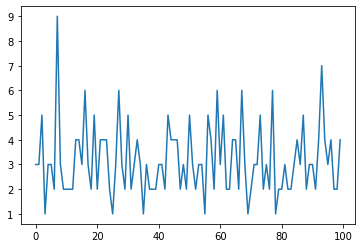

In [92]:
string4 = "Minimo: {}".format(min(dias2))
string5 = "Maximo: {}".format(max(dias2))
string6 = "promedio: {}".format(sum(dias2)/100)

print(string4)
print(string5)
print(string6)
plt.plot(dias);